##IMDB Reviews Assignment 1 Machine Learning

In [5]:
#Importing the IMDB data from library 
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [6]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
train_labels[0]

1

In [8]:
max([max(sequence) for sequence in train_data])

9999

In [9]:
#Getting the words from the dictionary
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


Preparing the data

In [10]:
#Encoding the integer sequences via multi-hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**Building the Model**

Model Definition 

In [13]:
#Building the model with 2 hidden layers and 16 nodes in each
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Compiling the model

In [14]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Validating your approach

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training the model

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5556 - accuracy: 0.7563 - val_loss: 0.4129 - val_accuracy: 0.8704
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3274 - accuracy: 0.8955 - val_loss: 0.3171 - val_accuracy: 0.8867
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2358 - accuracy: 0.9230 - val_loss: 0.2790 - val_accuracy: 0.8924
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1823 - accuracy: 0.9405 - val_loss: 0.2751 - val_accuracy: 0.8915
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1503 - accuracy: 0.9500 - val_loss: 0.2957 - val_accuracy: 0.8845
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1240 - accuracy: 0.9602 - val_loss: 0.2973 - val_accuracy: 0.8823
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1035 - accuracy: 0.9691 - val_loss: 0.3083 - val_accuracy: 0.8826
Epoch 8/20
30

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

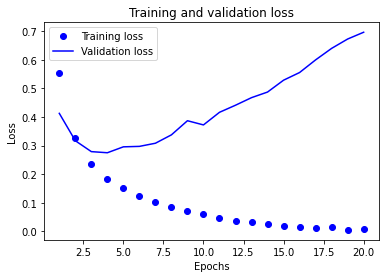

In [18]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

At 3 Epochs, the validation loss starts to increase and model is overfitting.

**Plotting the training and validation accuracy**

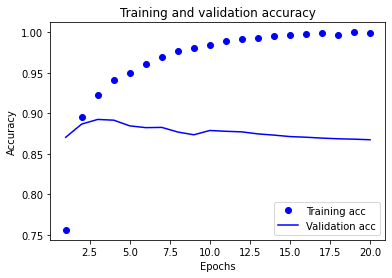

In [19]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

At the 3rd epoch, validation accuracy starts decrease while training accuracy is increasing. 

**Retraining a model from scratch**

In [20]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.4824 - accuracy: 0.8089
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2718 - accuracy: 0.9076
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2059 - accuracy: 0.9278
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2994 - accuracy: 0.8816


In [21]:
results

[0.29943403601646423, 0.8816400170326233]

**Using one hidden layer to see how it affects validation and test accuracy**




In [1]:
#Building the model with 1 hidden layers
from tensorflow import keras
from tensorflow.keras import layers

newmodel = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [2]:
newmodel.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [22]:
history_newmodel = newmodel.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.4986 - accuracy: 0.7931 - val_loss: 0.3873 - val_accuracy: 0.8689
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3143 - accuracy: 0.9048 - val_loss: 0.3460 - val_accuracy: 0.8578
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2439 - accuracy: 0.9233 - val_loss: 0.2946 - val_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2003 - accuracy: 0.9385 - val_loss: 0.2812 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1703 - accuracy: 0.9480 - val_loss: 0.2758 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1473 - accuracy: 0.9564 - val_loss: 0.2760 - val_accuracy: 0.8895
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1273 - accuracy: 0.9645 - val_loss: 0.2931 - val_accuracy: 0.8848
Epoch 8/20
30

In [23]:
history_dict_new = history_newmodel.history
history_dict_new.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting Training and Validation loss with one hidden layer**

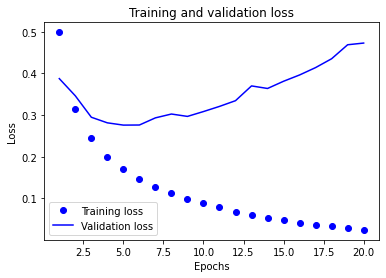

In [24]:
import matplotlib.pyplot as plt
history_dict_new = history_newmodel.history
loss_values = history_dict_new["loss"]
val_loss_values = history_dict_new["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Validation loss starts increasing at 6 epochs. Training loss decreases continuosly. 

**Plotting the training and validation accuracy**

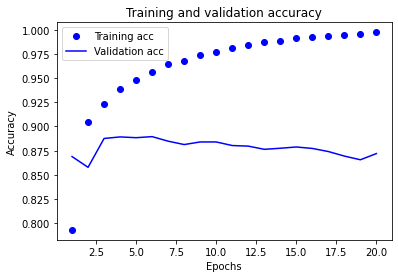

In [25]:
plt.clf()
acc = history_dict_new["accuracy"]
val_acc = history_dict_new["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Using one hidden layer affects training and validation accuracy. Validation accuracy increases at 3 epochs to 6 epochs. Decreasing the layers helped the accuracy for more epochs. This also leads to less computation time. 

## **Using 2 Layers with more hidden units**

In [27]:
#Building the model with 2 hidden layers and 64 units 
from tensorflow import keras
from tensorflow.keras import layers

newmodel64 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [28]:
newmodel64.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [29]:
history_newmodel64 = newmodel64.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 112ms/step - loss: 0.4896 - accuracy: 0.7746 - val_loss: 0.3266 - val_accuracy: 0.8804
Epoch 2/20
30/30 [==============================] - 2s 58ms/step - loss: 0.2661 - accuracy: 0.9034 - val_loss: 0.2874 - val_accuracy: 0.8859
Epoch 3/20
30/30 [==============================] - 2s 58ms/step - loss: 0.1919 - accuracy: 0.9281 - val_loss: 0.2830 - val_accuracy: 0.8834
Epoch 4/20
30/30 [==============================] - 2s 58ms/step - loss: 0.1366 - accuracy: 0.9517 - val_loss: 0.2924 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1097 - accuracy: 0.9611 - val_loss: 0.5186 - val_accuracy: 0.8356
Epoch 6/20
30/30 [==============================] - 2s 56ms/step - loss: 0.0869 - accuracy: 0.9707 - val_loss: 0.3385 - val_accuracy: 0.8828
Epoch 7/20
30/30 [==============================] - 2s 57ms/step - loss: 0.0605 - accuracy: 0.9812 - val_loss: 0.3759 - val_accuracy: 0.8816
Epoch 8/20
3

In [30]:
history_dict_new64 = history_newmodel64.history
history_dict_new64.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting Training and Validation Loss with more hidden units**

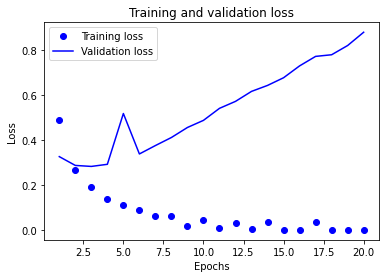

In [31]:
import matplotlib.pyplot as plt
history_dict_new_64 = history_newmodel64.history
loss_values = history_dict_new_64["loss"]
val_loss_values = history_dict_new_64["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

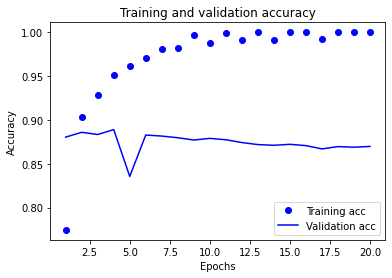

In [32]:
plt.clf()
acc = history_dict_new_64["accuracy"]
val_acc = history_dict_new_64["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

 At 3 epochs, the validation loss sharply decreases until 5 epochs. At 5 epochs, the validation increases until 6 epochs and then starts to decrease continusoly. Using more hidden units in the layers leads to less accuracy.

## **MSE Loss Function**

In [33]:
#Building the model with 2 hidden layers and 16 units 
from tensorflow import keras
from tensorflow.keras import layers

newmodelmse = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [34]:
#Using MSE loss function instead of binary crossentropy
newmodelmse.compile(optimizer="rmsprop",
              loss="MSE",
              metrics=["accuracy"])

In [35]:
history_newmodelmse = newmodelmse.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.1709 - accuracy: 0.7896 - val_loss: 0.1289 - val_accuracy: 0.8472
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0920 - accuracy: 0.9032 - val_loss: 0.0952 - val_accuracy: 0.8840
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0666 - accuracy: 0.9263 - val_loss: 0.0900 - val_accuracy: 0.8834
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0503 - accuracy: 0.9479 - val_loss: 0.0928 - val_accuracy: 0.8755
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0412 - accuracy: 0.9579 - val_loss: 0.0831 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0344 - accuracy: 0.9658 - val_loss: 0.0849 - val_accuracy: 0.8844
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0281 - accuracy: 0.9730 - val_loss: 0.0955 - val_accuracy: 0.8703
Epoch 8/20
30

In [36]:
history_dict_newmse = history_newmodelmse.history
history_dict_newmse.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting Training and Validation Loss with MSE**

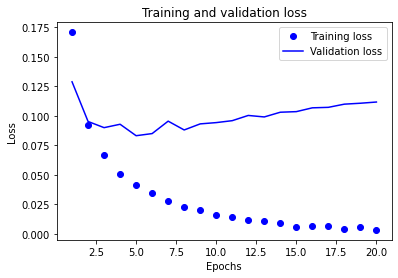

In [37]:
import matplotlib.pyplot as plt
history_dict_new_MSE = history_newmodelmse.history
loss_values = history_dict_new_MSE["loss"]
val_loss_values = history_dict_new_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

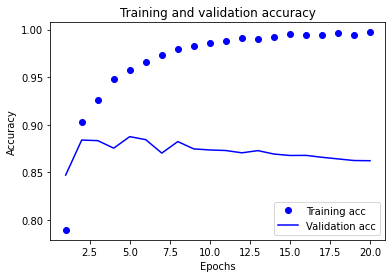

In [38]:
plt.clf()
acc = history_dict_new_MSE["accuracy"]
val_acc = history_dict_new_MSE["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Using the MSE loss function, the validation accuracy fluctuates more compared to when using binary crossentropy.  

# **Using Tanh Activation instead of Relu**

In [39]:
#Building the model with 2 hidden layers and 16 units using Tanh
from tensorflow import keras
from tensorflow.keras import layers

newmodeltanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [40]:
newmodeltanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [41]:
history_tanh = newmodeltanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.4770 - accuracy: 0.7937 - val_loss: 0.3589 - val_accuracy: 0.8684
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2714 - accuracy: 0.9080 - val_loss: 0.3054 - val_accuracy: 0.8773
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1927 - accuracy: 0.9345 - val_loss: 0.2766 - val_accuracy: 0.8873
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1473 - accuracy: 0.9505 - val_loss: 0.3008 - val_accuracy: 0.8804
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1150 - accuracy: 0.9615 - val_loss: 0.3104 - val_accuracy: 0.8807
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0912 - accuracy: 0.9679 - val_loss: 0.3483 - val_accuracy: 0.8767
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0680 - accuracy: 0.9779 - val_loss: 0.4024 - val_accuracy: 0.8690
Epoch 8/20
30

In [42]:
history_dict_newtanh = history_tanh.history
history_dict_newtanh.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

 **Plotting Training and Validation Loss**

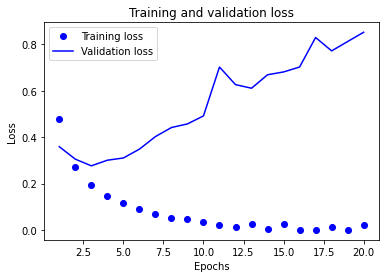

In [43]:
import matplotlib.pyplot as plt
history_dict_tanh = history_tanh.history
loss_values = history_dict_tanh["loss"]
val_loss_values = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

At 2.5 epochs, you will see the validation starts increasing. 

 **Plotting the training and validation accuracy**

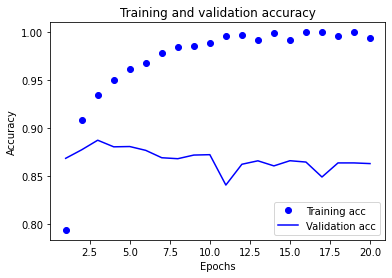

In [44]:
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Using Tanh instead of Relu, there are a lot more fluctuations with the validation accuracy. In the training and validation accuracy graph using Relu, there were aproxitmatly two fluctuations that were small. This means that using Relu is more accurate since the gap between training and validation loss is less than the graph above. Using Relu is more accurate because Tanh starts overfitting before 3 epochs. 

## **Using Dropout method** 

In [45]:
#Building the model with 3 hidden layers and 16 units using dropout method on one of the hidden layers. 
from tensorflow import keras
from tensorflow.keras import layers

newmodeldropout = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dropout(0.7),
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [46]:
newmodeldropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [47]:
history_dropout = newmodeldropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5196 - accuracy: 0.7610 - val_loss: 0.3633 - val_accuracy: 0.8607
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3322 - accuracy: 0.8753 - val_loss: 0.2839 - val_accuracy: 0.8839
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2573 - accuracy: 0.9025 - val_loss: 0.2739 - val_accuracy: 0.8891
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2247 - accuracy: 0.9169 - val_loss: 0.2805 - val_accuracy: 0.8888
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1940 - accuracy: 0.9289 - val_loss: 0.2901 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1808 - accuracy: 0.9354 - val_loss: 0.3030 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1673 - accuracy: 0.9397 - val_loss: 0.3229 - val_accuracy: 0.8842
Epoch 8/20
30

In [48]:
history_dict_dropout = history_dropout.history
history_dict_dropout.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting Training and Validation Loss**

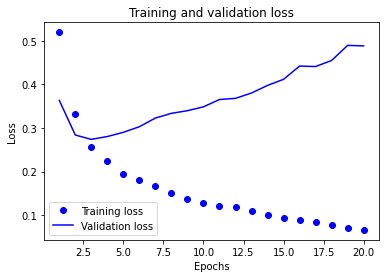

In [49]:
import matplotlib.pyplot as plt
history_dict_drop = history_dropout.history
loss_values = history_dict_dropout["loss"]
val_loss_values = history_dict_dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

At 2.5, the validation loss starts to increase while the training loss decreases. 

**Plotting the training and validation accuracy**

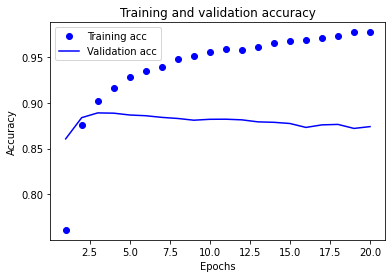

In [50]:
plt.clf()
acc = history_dict_drop["accuracy"]
val_acc = history_dict_drop["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The epochs continue to increase until 6 epochs. The dropout method increases accuracy because it removes the uneccessary nodes for prediction and it prevents overfitting. 